In [0]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
%matplotlib notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# make sure to mount google drive

## ROB
!ls 'drive/My Drive/CS7643/log_files/densenet201'

## CAMERON
# !ls 'drive/My Drive/Documents/SEMESTER12/CS7643/CS7643/log_files/resnext' 


Densenet-201.gdoc		densenet_lr_0.01_mom_0.9.log
densenet_lr_0.001_mom_0.5.log	densenet_lr_0.1_mom_0.5.log
densenet_lr_0.001_mom_0.99.log	densenet_lr_0.1_mom_0.99.log
densenet_lr_0.001_mom_0.9.log	densenet_lr_0.1_mom_0.9.log
densenet_lr_0.01_mom_0.5.log	withcrop
densenet_lr_0.01_mom_0.99.log


In [0]:
## ROB
drive_path = "drive/My Drive/CS7643/log_files/"

## CAMERON
# drive_path = "drive/My Drive/Documents/SEMESTER12/CS7643/CS7643/log_files/"


model_folder = "densenet201/" # CHANGE ME
path = drive_path + model_folder

In [0]:
def get_losses(file_path):
  train_loss_re = r"Train\sLoss\:\s([0-9\.]*)"
  val_loss_re = r"Val\sLoss\:\s([0-9\.]*)"

  train_losses = []
  val_losses = []

  with open(file_path, 'r') as f:
    text = f.read()
    train_losses = re.findall(train_loss_re, text)
    val_losses = re.findall(val_loss_re, text)
  
  train_losses = [float(loss) for loss in train_losses]
  val_losses = [float(loss) for loss in val_losses]
  return train_losses, val_losses

In [0]:
def get_train_and_val_accs(file_path):
    train_acc_re = r"Train\sAcc\:([0-9\.]*)"
    val_acc_re = r"Val\sAcc\:\s([0-9\.]*)"

    train_accs = []
    val_accs = []

    with open(file_path, 'r') as f:
      text = f.read()
      train_accs = re.findall(train_acc_re, text)
      val_accs = re.findall(val_acc_re, text)
    
    train_accs = [float(acc) for acc in train_accs]
    val_accs = [float(acc) for acc in val_accs]
    return train_accs, val_accs

In [0]:
def plot_losses(file_path, train_losses, val_losses):
  x_ticks = np.arange(0, 10, 1)

  fig, ax = plt.subplots()
  ax.plot(x_ticks, train_losses, label="Train Loss")
  ax.plot(x_ticks, val_losses, label="Val Loss")

  plt.ylim(bottom=0)
  plt.xlim(right=10)

  ax.set(xlabel="Epoch", ylabel="Loss", title="Loss")
  ax.grid()
  legend = ax.legend(loc='lower right', shadow=True, fontsize='large')

  output_file_path = file_path[:file_path.index(".log")] + "_loss_vs_epoch.png"
  plt.savefig(output_file_path)
  print("Saved graph:", output_file_path)

In [0]:
def plot_accs(file_path, train_accs, val_accs):
    x_ticks = np.arange(0, 10, 1)

    fig, ax = plt.subplots()
    ax.plot(x_ticks, train_accs, label="Train Accuracy")
    ax.plot(x_ticks, val_accs, label="Val Accuracy")

    plt.ylim(bottom=0.6, top=1.0)
    plt.xlim(right=10)

    ax.set(xlabel="Epoch", ylabel="Accuracy", title="Train and Validation Accuracies")
    ax.grid()
    legend = ax.legend(loc='lower right', shadow=True, fontsize='large')

    output_file_path = file_path[:file_path.index(".log")] + "_acc_vs_epoch.png"
    plt.savefig(output_file_path)
    print("Saved graph:", output_file_path)

Making loss figures for drive/My Drive/CS7643/log_files/densenet201/
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.9_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.5_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.99_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.99_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.9_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.5_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.99_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.9_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.5_loss_vs_epoch.png


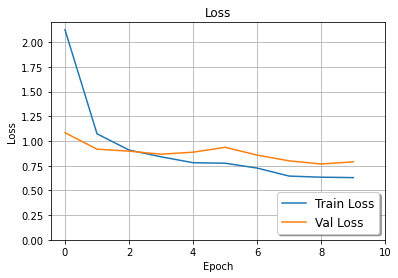

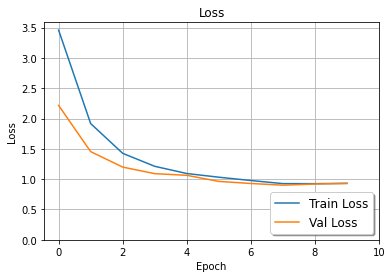

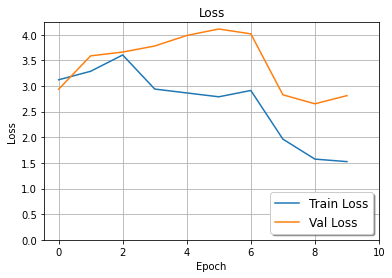

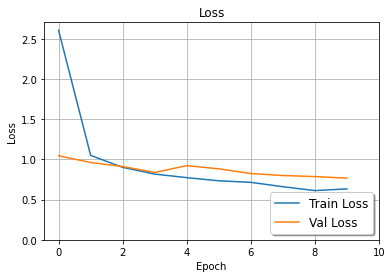

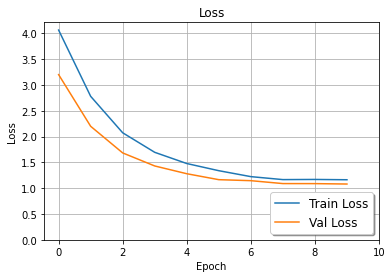

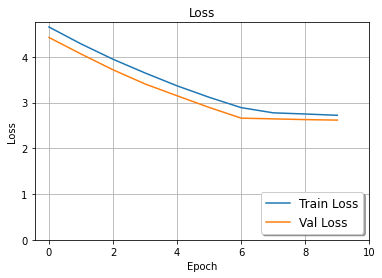

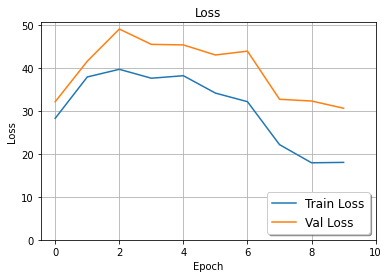

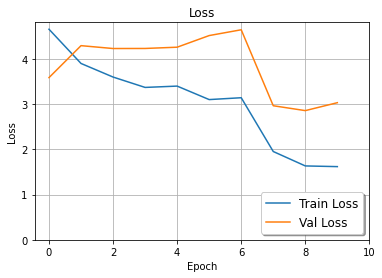

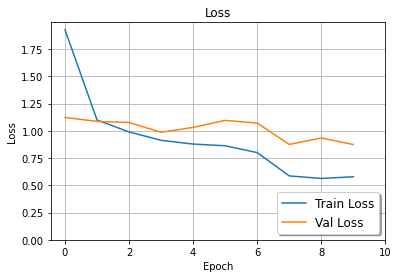

In [10]:
### MAKE ALL LOSS IMAEGS
def make_loss_fig(file_path):
  train_losses, val_losses = get_losses(file_path)
  plot_losses(file_path, train_losses, val_losses)

print("Making loss figures for", path)
for file_name in os.listdir(path):
  if ".log" in file_name:
    file_path = path + file_name
    make_loss_fig(file_path)

Making accuracy figures for drive/My Drive/CS7643/log_files/densenet201/
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.9_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.5_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.01_mom_0.99_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.99_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.9_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.001_mom_0.5_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.99_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.9_acc_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_lr_0.1_mom_0.5_acc_vs_epoch.png


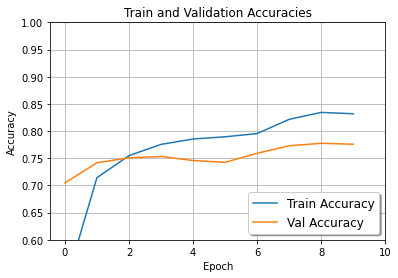

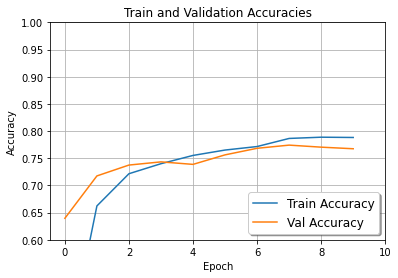

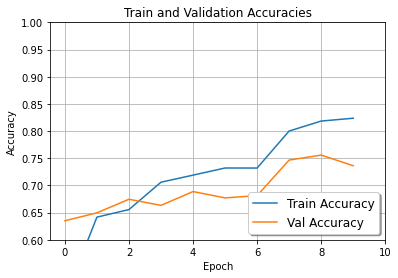

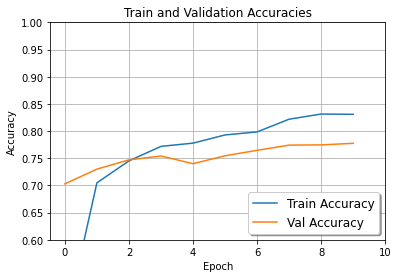

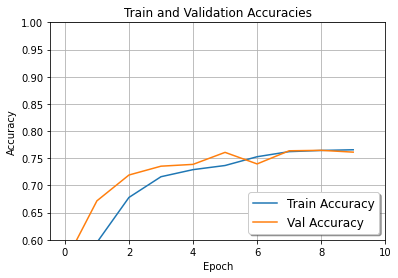

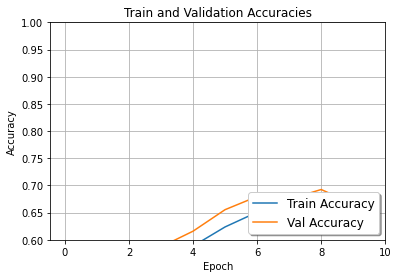

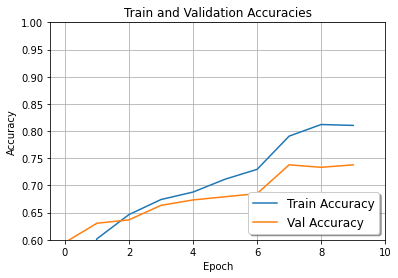

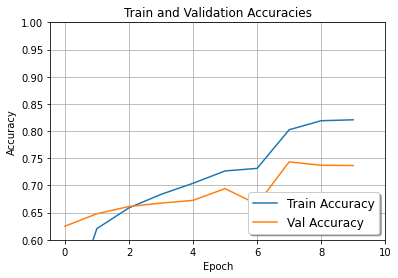

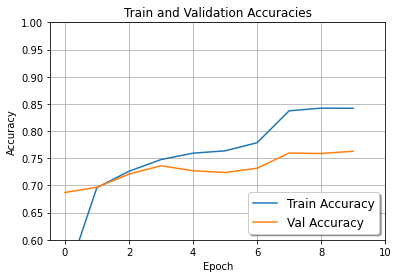

In [11]:
### MAKE ALL ACCURACY IMAGES
def make_acc_fig(file_path):
    train_accs, val_accs = get_train_and_val_accs(file_path)
    plot_accs(file_path, train_accs, val_accs)

print("Making accuracy figures for", path)
for file_name in os.listdir(path):
  if ".log" in file_name:
    file_path = path + file_name
    make_acc_fig(file_path)

Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_best_loss_vs_epoch.png
Saved graph: drive/My Drive/CS7643/log_files/densenet201/densenet_best_acc_vs_epoch.png


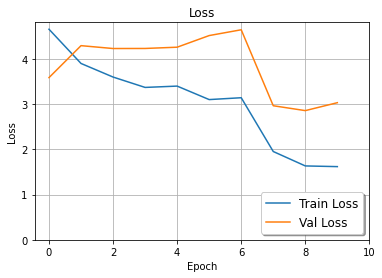

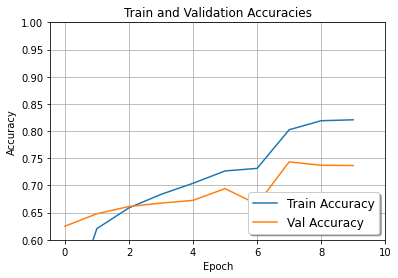

In [14]:
### MAKE LOSS and ACC GRAPH of one file
# file_path = drive_path + "resnext/resnext_best.log"
file_path = drive_path + "densenet201/densenet_best.log"
make_loss_fig(file_path)
make_acc_fig(file_path)

Saved graph: drive/My Drive/Documents/SEMESTER12/CS7643/CS7643/log_files/val_loss_model_comparison.png


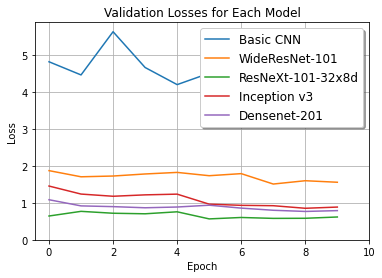

In [0]:
### make loss graph of best performing of each model

path_basic = drive_path + "basicCNN/basicmodel_lr_0.01_mom_0.5.log"
path_wideresnet = drive_path + "wideresnet101/wideresnet_lr_0.01_mom_0.9.log"
path_resnext = drive_path + "resnext/resnext_best.log"
path_inception = drive_path + "inception v3/inception_v3_best.log"
path_densenet = drive_path + "densenet201/densenet_lr_0.01_mom_0.9.log"


_, val_losses_basic = get_losses(path_basic)
_, val_losses_wideresnet = get_losses(path_wideresnet)
_, val_losses_resnext = get_losses(path_resnext)
val_losses_resnext = val_losses_resnext[:10]
_, val_losses_inception = get_losses(path_inception)
_, val_losses_densenet = get_losses(path_densenet)

x_ticks = np.arange(0, 10, 1)
fig, ax = plt.subplots()

ax.plot(x_ticks, val_losses_basic, label="Basic CNN")
ax.plot(x_ticks, val_losses_wideresnet, label="WideResNet-101")
ax.plot(x_ticks, val_losses_resnext, label="ResNeXt-101-32x8d")
ax.plot(x_ticks, val_losses_inception, label="Inception v3")
ax.plot(x_ticks, val_losses_densenet, label="Densenet-201")

plt.ylim(bottom=0)
plt.xlim(right=10)

ax.set(xlabel="Epoch", ylabel="Loss", title="Validation Losses for Each Model")
ax.grid()
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

output_file_path = drive_path + "val_loss_model_comparison.png"
plt.savefig(output_file_path)
print("Saved graph:", output_file_path)

Saved graph: drive/My Drive/Documents/SEMESTER12/CS7643/CS7643/log_files/val_acc_model_comparison.png


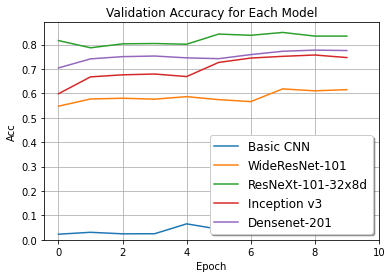

In [0]:
### make accuracy graph of best performing of each model

path_basic = drive_path + "basicCNN/basicmodel_lr_0.01_mom_0.5.log"
path_wideresnet = drive_path + "wideresnet101/wideresnet_lr_0.01_mom_0.9.log"
path_resnext = drive_path + "resnext/resnext_best.log"
path_inception = drive_path + "inception v3/inception_v3_best.log"
path_densenet = drive_path + "densenet201/densenet_lr_0.01_mom_0.9.log"

_, val_acc_basic = get_train_and_val_accs(path_basic)
_, val_acc_wideresnet = get_train_and_val_accs(path_wideresnet)
_, val_acc_resnext = get_train_and_val_accs(path_resnext)
val_acc_resnext = val_acc_resnext[:10]
_, val_acc_inception = get_train_and_val_accs(path_inception)
_, val_acc_densenet = get_train_and_val_accs(path_densenet)


x_ticks = np.arange(0, 10, 1)
fig, ax = plt.subplots()

ax.plot(x_ticks, val_acc_basic, label="Basic CNN")
ax.plot(x_ticks, val_acc_wideresnet, label="WideResNet-101")
ax.plot(x_ticks, val_acc_resnext, label="ResNeXt-101-32x8d")
ax.plot(x_ticks, val_acc_inception, label="Inception v3")
ax.plot(x_ticks, val_acc_densenet, label="Densenet-201")

plt.ylim(bottom=0)
plt.xlim(right=10)

ax.set(xlabel="Epoch", ylabel="Acc", title="Validation Accuracy for Each Model")
ax.grid()
legend = ax.legend(loc='lower right', shadow=True, fontsize='large')

output_file_path = drive_path + "val_acc_model_comparison.png"
plt.savefig(output_file_path)
print("Saved graph:", output_file_path)

In [0]:
### hyperparameter tuning graph 

path_densenet = drive_path + "densenet201/"

for file_name in os.listdir(path):
  if ".log" in file_name:
    file_path = path_sensenet + file_name
    make_acc_fig(file_path)